<a href="https://colab.research.google.com/github/oksk1111/self_machinelearning/blob/main/selfML_ch01_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도 학습 알고리즘
1. 분류(Classification)
  * 샘플을 여러개의 종류(=클래스) 중 하나로 분류하는 문제
  * binary classification: 2개중 1개 선택
2. 회귀(Regression)
  * 임의의 어떤 값을 예측하는 문제
  * 예: 경제 성장률 예측, 배달 도착시간 예측, 농어의 무게 예측

***
## 머신러닝 문제풀이 방식
1. data 준비, 문제/데이터 분포 파악 -> 알고리즘 선정
2. 학습 + 평가 (train_data, valid_data)
3. 예측
4. 검증 (test_data)

### 생선 분류 문제
> 데이터셋: https://www.kaggle.com/aungpyaeap/fish-market

**요구사항**: 생선 이름을 자동으로 알려주는 머신러닝을 만들자


In [ ]:
# 문제: 생선 분류 문제; 생선의 길이와 무게로 어떤 생선인지 맞춰라

# 1. data 준비

## feature 1 = length (x축)
## feature 2 = weight (y축)
## target = 0 or 1 (도미(bream) = 1, 빙어(smelt) = 0)

## 전체 bream 갯수 = 35
## 전체 smelt 갯수 = 14

## data 유형1: 종류가 나뉘어 있는 데이터들
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

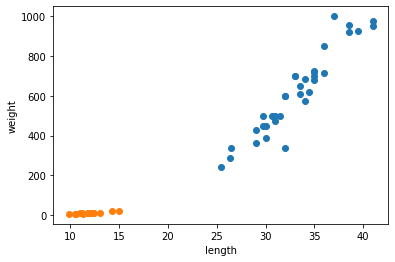

In [ ]:
# 데이터 분포도를 먼저 살펴보자
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)   # (x, y); 두개의 feature 를 사용하여 분포 파악; np array, 파이썬 list 모두 가능 (np array 가 출력시 파이썬 list 로 변환됨)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#- Scatter 그래프가 Linear(선형) 하게 노출되었다고 함 (데이터분포가 일직선에 가까운 형태)

## KNeighborsClassifier (k-최근접 이웃 분류)
방식: 찾고자 하는 데이터의 가장 가까운 직선거리에 어떤 데이터가 있는지 살피는방식

단점: 데이터가 아주 많은 경우 직선거리 계산에 메모리와 시간이 많이 필요함 (모든 데이터의 직선 거리 계산)

***

문제풀이 고려사항
1. 거리기반 알고리즘 사용
2. #1 사용시 feature가 여러개일 때 모든 feature 의 범위를 일치시키기 위해 전처리 작업으로 표준화 진행
* 표준화: 데이터의 스케일(범위)를 한정화 함
* 분류에서 표준화를 위한 표준점수 계산을 위해 표준편차 이용함
 * 표준점수 = (원본데이터 - 평균) / 표준편차

***

#### scikit-learn 패키지에서 훈련시 fit() 를 사용할 때,
* train_data 인 features는 다음 형태의 2차원 리스트

```
[[aa1, bb1, ...],

 [aa2, bb2, ...],

 [aa3, bb3, ...],

 ...

 [aaN, bbN, ...]]

```

* target_data 인 정답은 각 train_data 의 정답이고, 1차원 리스트

```
[1, 1, 0, ..., #]
```

#### scikit-learn 패키지에서 모델의 성능평가를 위해 score() 를 사용할 때,
* 0~1 중 1에 가까울수록 정확도 높은 모델
* (정확히 맞힌 개수) / (전체 데이터 개수)

In [ ]:
#** 중요하지 않은 코드 **
#
# 여러데이터 중에서 분류하는 문제이기에 위 데이터가 개별일지라도 합쳐져 있다고 가정한다.
# 즉, 아래 데이터 합치는 부분은 평상시에 쓰진 않으나 테스트를 위해 참고만 한다.

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)]    # zip(list1, list2, ...) - 나열된 리스트에서 데이터를 쌍으로 뽑아주는 함수
print(fish_data)

fish_target = [1] * 35 + [0] * 14   # 정답지; 1 = 도미, 0 = 빙어
print(fish_target)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# 2. 학습 + 평가

## 학습: fit() = Training; (Features, Target), ([[]], []) <- 이 형태로 써야함 (2차원 리스트, 1차원 리스트)
## 평가: score() = 모델 평가; 0~1 중 1에 가까울수록 정확도 높은 모델; (정확히 맞힌 개수) / (전체 데이터 개수)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)    
kn.score(fish_data, fish_target)    # 학습한 데이터를 정답평가에 쓰면 당연히 1.0 값이 나온다; 그래서 평가용 test-set가 별도로 필요하다
#- Classifier 의 score = 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율

# fit() 결과 요소 - 모든 항목의 거리
# print(kn._fit_X)
# print(kn._y)

# KNeighborsClassifier() 알고리즘에서 가까운 거리의 참고할 표본 지정이 가능하다. 기본값은 5. 값 = n_neighbors
# 수정방법: kn = KNeighborsClassifier(n_neighbors=49);  kn.n_neighbors = 49

1.0

In [ ]:
# 3. 예측
## predict([[]])

kn.predict([[30, 600]])   # predict() = 데이터의 정답 예측; ([[]]) <- 이 형태로 써야함 (2차원 리스트)

array([1])

***

위 데이터는 훈련데이터와 평가데이터를 같은 값을 써서 운영방식만 살펴보았다.

다음으로 실제 데이터를 예로 들어 Train-set, Test-set 을 나눠 진행한다.


## 훈련데이터, 테스트 데이터 분리

* 올바른 훈련데이터를 위해 샘플링편향(Sampling bias)을 없애기 위해 데이터를 고루 분포해야 함

In [ ]:
# data 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
               35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0,
               9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
               500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
               6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 훈련 세트로, 입력값 중 0~34 까지 사용
train_input = fish_data[:35]
# 훈련 세트로, 타깃 중 0~34 까지 사용
train_target = fish_target[:35]

# 테스트 세트로, 입력값 중 35~마지막 까지 사용
test_input = fish_data[35:]
# 테스트 세트로, 타깃 중 35~마지막 까지 사용
test_target = fish_target[35:]

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

In [ ]:
import numpy as np

# np 로 array 저장 이유: 배열 형태의 데이터에 기타 수식을 적용하기 위해
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(fish_data)
print(input_arr)
print(input_arr.shape)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700.

In [ ]:
np.random.seed(42)  # 일정한 결과값을 갖기 위해 seed() 함수 사용; 없어도 됨
index = np.arange(49)   # (n): 0~n 까지의 정수 qoduf; (s, e): start 부터 end 까지의 정수; (s, e, step): start 부터 end 까지 step 단위로 수열 (소수 가능)
np.random.shuffle(index)
print(index)

# np array 를 통해 특정 인덱스들의 데이터를 가져올 수 있다. 사용형태 array[[#, #, ...]]  (2중 배열 형태여야 한다!)
# 랜덤한 학습 데이터
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

# 랜덤한 테스트 데이터
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


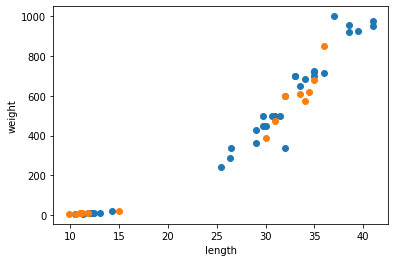

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])   # x: length, y: weight; np array 사용방법
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
# 개별 테스트한 결과값 얻기
print(kn.predict(test_input))   # return np array;    predict([[]])   2차원 features 데이터
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


## scikit-learn 과 numpy 를 이용한 데이터 전처리

* numpy 의 column_stack(), concatenate()
 * column_stack(list1, list2, ...): 리스트들의 각 항목을 하나씩 빼서 2차원 리스트로 만든다.
 * concatenate(list1, list2, ...): 리스트들을 모두 붙여 1차원 리스트로 만든다.  
* 사이킷런의 train_test_split()

In [ ]:
# 1. data 준비

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
               35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0,
               9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
               500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
               6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np

# 학습을 위해 데이터를 2차원 np array 형태로 변형한다.
## feature 기준으로 1개의 행이 한개의 데이터가 될 수 있도록 변경하는 방법!!
##! column_stack 으로 데이터를 row 기준으로 쌓을 수 있다. 이때 입력은 tuple 이다.
fish_data = np.column_stack((fish_length, fish_weight))   # column_stack( ([feature1_data], [feature2_data], [feature3_data], ...) )
print(fish_data)

##! 아래 방식으로는 이종 데이터를 하나씩 합칠 수 없다! 주의
#fish_data = np.array([fish_length, fish_weight])
#print(fish_data)

# target 1차원 배열 만들기: concatenate 를 통해 1차원 배열 여러개를 붙일 수 있다. 데이터 입력은 tuple 형태이다.
fish_target = np.concatenate((np.ones(35), np.zeros(14)))   # concatenate( ([target1_data], [target2_data], ...) )
print(fish_target)
print('---------1')


# 데이터 분리: Train-set, Test-set
from sklearn.model_selection import train_test_split

# 전체데이터에서 Train/Test set 분리: train_test_split()
## return - 입력데이터(2), 타깃데이터(2)
## 25% 를 테스트 데이터로 분리
## 기준데이터(stratify)가 없으면 전체데이터에서 25%를 분리하기에 편향(bias) 발생할 수 있음; 기준데이터가 있으면 해당 데이터에서 25%를 분리
## random_state 는 random 발생 기준값이라서 무시해도 됨.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(train_target, test_target)    # test_target 의 데이터가 고르게 분포되어 있나 파악 (25%)
print('---------2')


# feature 들이 각각 다른 분포일 때는 표준화를 통해 분포를 일치시켜 줘야 한다.
# 표준점수 = (원본데이터 - 평균) / 표준편차
mean = np.mean(train_input, axis=0)   # 데이터 중 행(↓, axis=0) 기준 평균; axis는 방향임을 주의하자. axis=1 인경우 열 기준으로 데이터를 본다
std = np.std(train_input, axis=0)     # 데이터 중 행(↓, axis=0) 기준 표준편차
print(mean, std)      # 결과는 (length, weight)평균, (length, weight) 표준편차

# 표준점수
#- 아래 계산식은 산술적이고, 사실 정규화를 위해 사이킷런의 StandardScaler() 를 사용한다. (ch03)
train_scaled = (train_input - mean) / std   # np에서 계산 가능한 전체 데이터 X 계산용데이터 처리 방법; broadcasting
print(train_scaled)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
---------1
(36,

In [ ]:
#** 연습 코드 **

import numpy as np

print(np.column_stack(([1,2,3], [4,5,6])))
print(np.ones(5))

[[1 4]
 [2 5]
 [3 6]]
[1. 1. 1. 1. 1.]


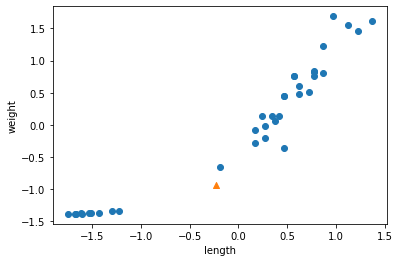

In [ ]:
# 전처리된 데이터 분포 확인

import matplotlib.pyplot as plt

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])     # train_scaled[, 0] = length, [. 1] = weight

# 새로 확인할 데이터의 위치 (새로운 데이터도 표준화 해야 함)
new_scaled = ([25, 150] - mean) / std
plt.scatter(new_scaled[0], new_scaled[1], marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#- 가공전 데이터와 비슷한 그래프를 그렸지만 x, y 축의 범위가 동일시 되었음에 주목하자!!

In [ ]:
# 2. 학습 + 평가

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
#kn.fit(train_input, train_target)   # fit(2차원 array, 1차원 array)
kn.fit(train_scaled, train_target)   # 전처리된 데이터를 가지고 학습 진행

#kn.score(test_input, test_target)
test_scaled = (test_input - mean) / std     # 학습용 데이터를 전처리하였으면, 테스트 데이터도 같은 방식으로 전처리한다
kn.score(test_scaled, test_target)

1.0

In [ ]:
# 3. 예측

#print(kn.predict( [[25, 150]] ))
kn.predict([new_scaled])

#- bream(1) 로 판단

array([1.])

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]] [[21 14 34 32  5]]


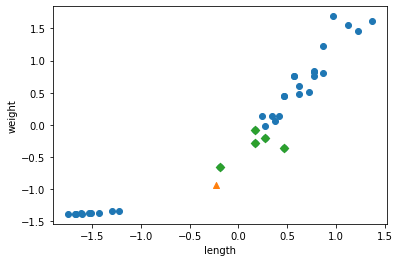

In [ ]:
# 4.검증 - KNeighborsClassifier 에서 가까운 거리의 데이터를 그래프에서 확인

distances, indexes = kn.kneighbors([new_scaled])    # 새로운 데이터가 입력으로 주어지면 가장 가까운 데이터의 거리, 인덱스를 출력

print(distances, indexes)

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new_scaled[0], new_scaled[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()